In [8]:
# 1. 워드 임베딩 모델로부터 2개의 tsv 파일 생성하기
!python -m gensim.scripts.word2vec2tensor --input eng_w2v --output eng_w2v

2023-01-24 14:39:46,751 - word2vec2tensor - INFO - running c:\Users\Myeong\anaconda3\envs\jin\lib\site-packages\gensim\scripts\word2vec2tensor.py --input eng_w2v --output eng_w2v
2023-01-24 14:39:46,751 - keyedvectors - INFO - loading projection weights from eng_w2v
2023-01-24 14:39:47,839 - utils - INFO - KeyedVectors lifecycle event {'msg': 'loaded (21613, 100) matrix of type float32 from eng_w2v', 'binary': False, 'encoding': 'utf8', 'datetime': '2023-01-24T14:39:47.838878', 'gensim': '4.3.0', 'python': '3.8.0 (default, Nov  6 2019, 16:00:02) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'load_word2vec_format'}
2023-01-24 14:39:48,934 - word2vec2tensor - INFO - 2D tensor file saved to eng_w2v_tensor.tsv
2023-01-24 14:39:48,934 - word2vec2tensor - INFO - Tensor metadata file saved to eng_w2v_metadata.tsv
2023-01-24 14:39:48,935 - word2vec2tensor - INFO - finished running word2vec2tensor.py


In [ ]:
# 시각화 링크 : https://projector.tensorflow.org/

## Recommendation System using Document Embedding

In [1]:
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import re
from PIL import Image
from io import BytesIO
from nltk.tokenize import RegexpTokenizer
import nltk
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity

urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/data.csv", filename="data.csv")
df = pd.read_csv("data.csv")
print('전체 문서의 수 :',len(df))

전체 문서의 수 : 2382


In [2]:
df.head()

,Unnamed: 0.1,Desc,Unnamed: 0,author,genre,image_link,rating,title
0,0,We know that power is shifting: From West to E...,0.0,Moisés Naím,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.63,The End of Power: From Boardrooms to Battlefie...
1,1,Following the success of The Accidental Billio...,1.0,Blake J. Harris,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.94,"Console Wars: Sega, Nintendo, and the Battle t..."
2,2,How to tap the power of social software and ne...,2.0,Chris Brogan,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.78,Trust Agents: Using the Web to Build Influence...
3,3,William J. Bernstein is an American financial ...,3.0,William J. Bernstein,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.20,The Four Pillars of Investing
4,4,Amazing book. And I joined Steve Jobs and many...,4.0,Akio Morita,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.05,Made in Japan: Akio Morita and Sony


In [3]:
# 전처리 함수들 정의
def _removeNonAscii(s):
    return "".join(i for i in s if ord(i)<128)

def make_lower_case(text):
    return text.lower()

def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words('english'))
    text = [word for word in text if not word in stops]
    text = ' '.join(text)
    return text

def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r"", text)

def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
    text = tokenizer.tokenize(text)
    text = ' '.join(text)
    return text

df['cleaned'] = df['Desc'].apply(_removeNonAscii)
df['cleaned'] = df.cleaned.apply(make_lower_case)
df['cleaned'] = df.cleaned.apply(remove_stop_words)
df['cleaned'] = df.cleaned.apply(remove_punctuation)
df['cleaned'] = df.cleaned.apply(remove_html)

In [4]:
df['cleaned'].head()

0    know power shifting west east north south pres...
1    following success accidental billionaires mone...
2    tap power social software networks build busin...
3    william j bernstein american financial theoris...
4    amazing book joined steve jobs many akio morit...
Name: cleaned, dtype: object

In [5]:
df['cleaned'].replace('', np.nan, inplace=True)
df = df[df['cleaned'].notna()]
print(len(df))

2381


In [6]:
corpus = []
for words in df['cleaned']:
    corpus.append(words.split())

In [9]:
word2vec_model = Word2Vec(size = 300, window=5, min_count = 2, workers = -1)
word2vec_model.build_vocab(corpus)
word2vec_model.intersect_word2vec_format('C:/Users/Myeong/dding/data/GoogleNews-vectors-negative300.bin', lockf=1.0, binary=True)
word2vec_model.train(corpus, total_examples = word2vec_model.corpus_count, epochs = 15)

c:\Users\Myeong\anaconda3\envs\jin\lib\site-packages\gensim\models\base_any2vec.py:742: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  warnings.warn(


(0, 0)

In [ ]:
# word2vec_model = Word2Vec(vector_size = 300, window=5, min_count=2, workers=-1)
# word2vec_model.build_vocab(corpus)
# word2vec_model.wv.vectors_lockf = np.ones(len(word2vec_model.wv), dtype=np.float32)
# word2vec_model.wv.intersect_word2vec_format('C:/Users/Myeong/dding/data/GoogleNews-vectors-negative300.bin', lockf=1.0, binary=True)
# word2vec_model.train(corpus, total_examples= word2vec_model.corpus_count, epochs=15)

(0, 0)

In [10]:
word2vec_model.corpus_count

2381

In [ ]:
# word2vec_model.wv.save_word2vec_format('c:/Users/Myeong/dding/recommend_w2v')
# loaded_model = KeyedVectors.load_word2vec_format('c:/Users/Myeong/dding/recommend_w2v')

In [ ]:
# len(word2vec_model.wv.key_to_index.keys())

In [11]:
def get_document_vectors(document_list):
    document_embedding_list = []

    # 각 문서에 대해서
    for line in document_list:
        doc2vec = None
        count = 0
        for word in line.split():
            if word in word2vec_model.wv.vocab:
                count += 1
                # 해당 문서에 있는 모든 단어들의 벡터값을 더한다.
                if doc2vec is None:
                    doc2vec = word2vec_model[word]
                else:
                    doc2vec = doc2vec + word2vec_model[word]

        if doc2vec is not None:
            # 단어 벡터를 모두 더한 벡터의 값을 문서 길이로 나눠준다.
            doc2vec = doc2vec / count
            document_embedding_list.append(doc2vec)

    # 각 문서에 대한 문서 벡터 리스트를 리턴
    return document_embedding_list

In [ ]:
# def get_document_vectors(document_list):
#     document_embedding_list = list()

#     for line in document_list:
#         doc2vec = None
#         count = 0
#         for word in line.split():
#             if word in word2vec_model.wv.key_to_index:
#                 count += 1
#                 if doc2vec is None:
#                     doc2vec = loaded_model[word]
#                 else:
#                     dec2vec = doc2vec + loaded_model[word]
        
#         if doc2vec is not None:
#             doc2vec = doc2vec / count
#             document_embedding_list.append(doc2vec)
    
#     return document_embedding_list

In [12]:
document_embedding_list = get_document_vectors(df['cleaned'])
print(len(document_embedding_list))

C:\Users\Myeong\AppData\Local\Temp\ipykernel_17664\913432021.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  doc2vec = word2vec_model[word]
C:\Users\Myeong\AppData\Local\Temp\ipykernel_17664\913432021.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  doc2vec = doc2vec + word2vec_model[word]


2381


## 추천 시스템 구현

In [13]:
cosine_similarities = cosine_similarity(document_embedding_list, document_embedding_list)
print(cosine_similarities.shape)

(2381, 2381)


In [14]:
def recommendations(title):
    books = df[['title', 'image_link']]

    indices = pd.Series(df.index, index=df['title']).drop_duplicates()
    idx = indices[title]

    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key = lambda x : x[1], reverse=True)
    sim_scores = sim_scores[1:6]

    book_indices = [i[0] for i in sim_scores]

    recommend = books.iloc[book_indices].reset_index(drop=True)

    fig = plt.figure(figsize=(20,30))

    for index, row in recommend.iterrows():
        response = requests.get(row['image_link'])
        img = Image.open(BytesIO(response.content))
        fig.add_subplot(1, 5, index+1)
        plt.imshow(img)
        plt.title(row['title'])


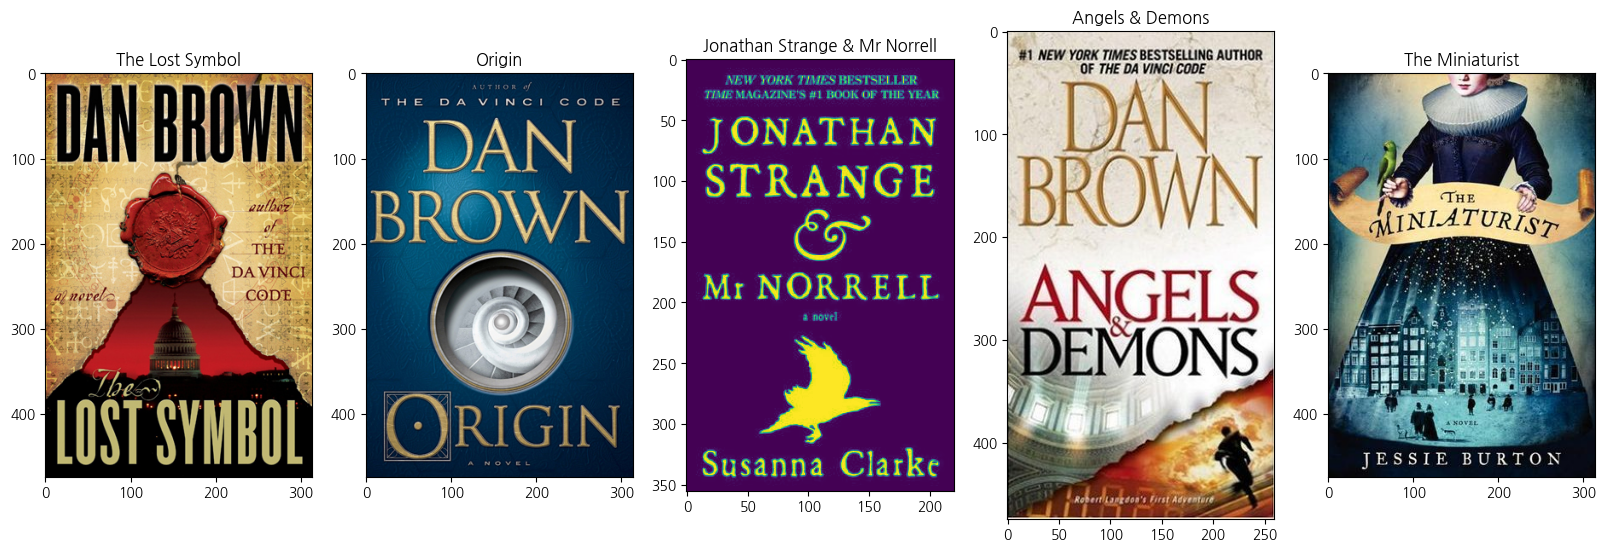

In [15]:
recommendations('The Da Vinci Code')

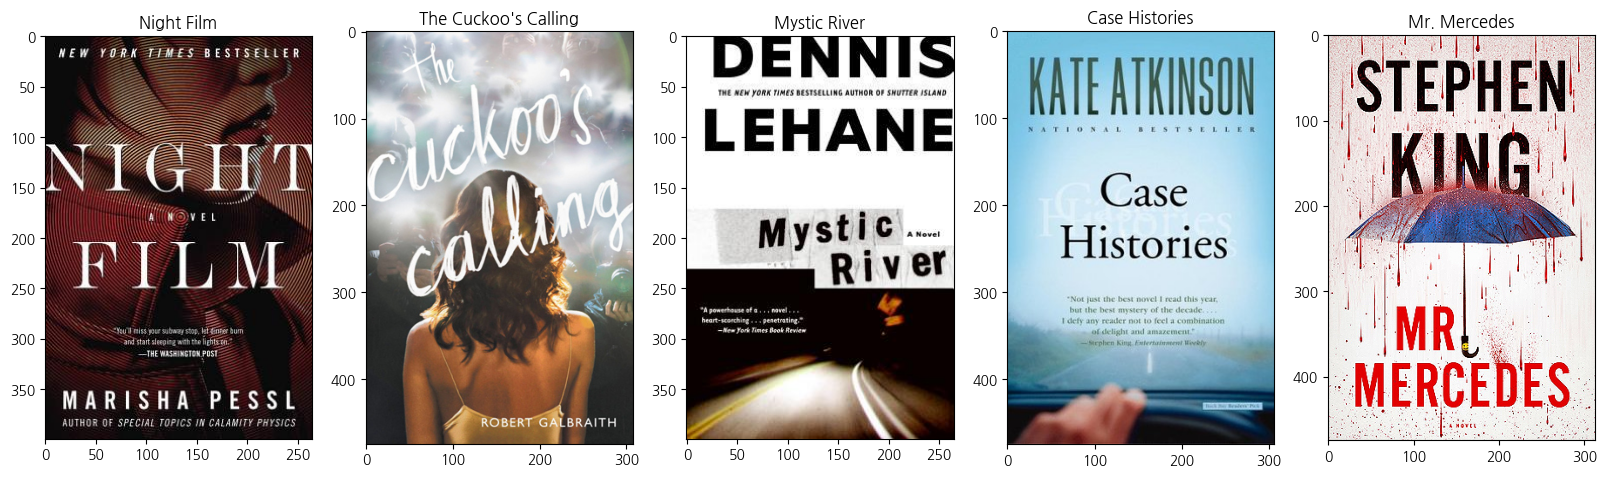

In [16]:
recommendations("The Murder of Roger Ackroyd")

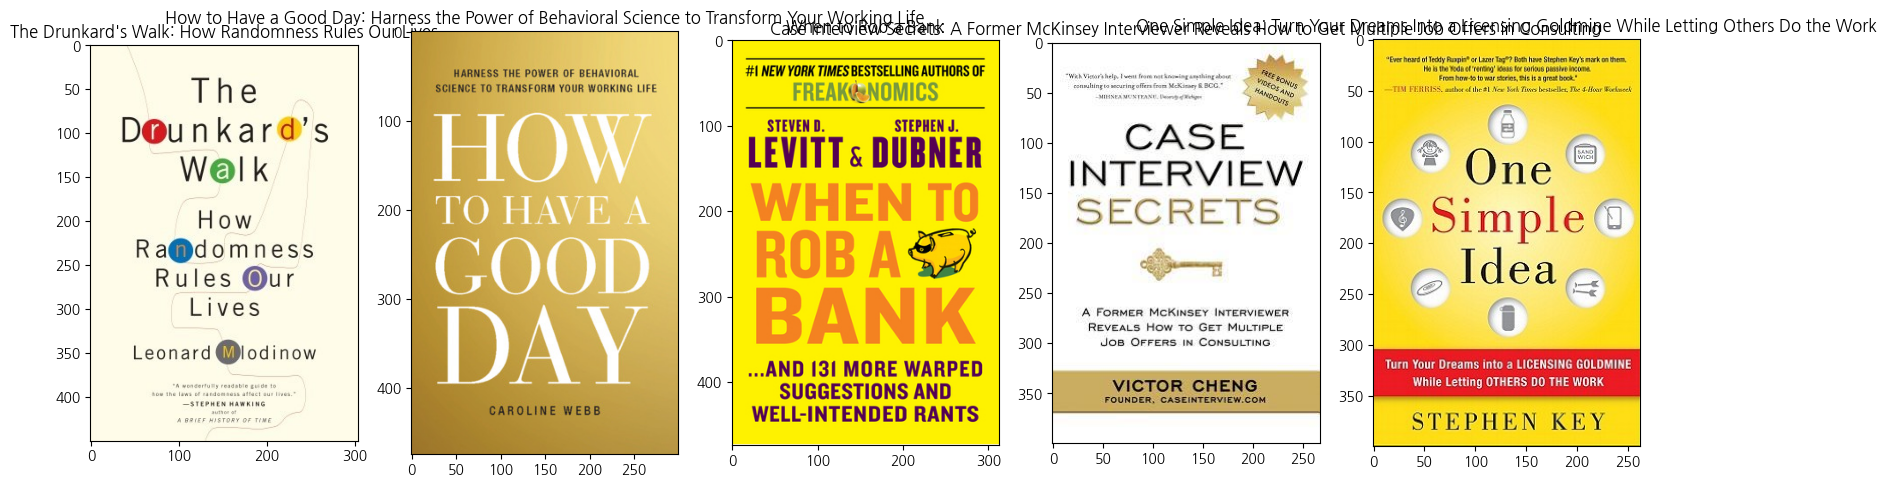

In [17]:
recommendations("The Four Pillars of Investing")

## 워드 임베딩의 평균

In [21]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 20000

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
print(len(x_train))
print(len(x_test))

25000
25000


In [22]:
print(x_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [25]:
print(np.mean(list(map(len, x_train)), dtype=int))
print(np.mean(list(map(len, x_test)), dtype=int))

238
230


In [26]:
max_len = 400
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)
print(x_train.shape)
print(x_test.shape)

(25000, 400)
(25000, 400)


In [27]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 64

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))

model.add(GlobalAveragePooling1D())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 4s 4ms/step - loss: 0.6272 - acc: 0.7442 - val_loss: 0.5200 - val_acc: 0.8120
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4282 - acc: 0.8533 - val_loss: 0.3783 - val_acc: 0.8676
Epoch 3/10
625/625 [==============================] - 2s 4ms/step - loss: 0.3176 - acc: 0.8928 - val_loss: 0.3239 - val_acc: 0.8782
Epoch 4/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2616 - acc: 0.9096 - val_loss: 0.2967 - val_acc: 0.8872
Epoch 5/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2237 - acc: 0.9241 - val_loss: 0.2834 - val_acc: 0.8892
Epoch 6/10
625/625 [==============================] - 2s 4ms/step - loss: 0.1951 - acc: 0.9345 - val_loss: 0.2748 - val_acc: 0.8942
Epoch 7/10
625/625 [==============================] - 2s 4ms/step - loss: 0.1718 - acc: 0.9433 - val_loss: 0.2722 - val_acc: 0.8936
Epoch 8/10
625/625 [==============================] - 2s 4ms/step - loss: 0.

In [28]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.2926 - acc: 0.8861


[0.2925676703453064, 0.8860800266265869]

## Doc2Vec 으로 공시 사업보고서 유사도 계산하기

In [3]:
import pandas as pd
from konlpy.tag import Okt
from gensim.models.doc2vec import TaggedDocument

df = pd.read_csv('c:/Users/Myeong/dding/data/dart.csv')
df = df.dropna()
df

,code,market,name,business
0,000020,KOSPI,동화약품,II. 사업의 내용\n1. 사업의 개요\n가. 일반적인 사항\n기업회계기준서 제11...
1,000040,KOSPI,KR모터스,II. 사업의 내용\n1. 사업의 개요\n가. 업계의 현황\n수출주력시장인 유럽 불...
2,000050,KOSPI,경방,II. 사업의 내용\n1. 사업의 개요\n(1) 산업의 특성\n[섬유사업부문]\n면...
3,000060,KOSPI,메리츠화재,"II. 사업의 내용\n1. 사업의 개요\n가. 산업의 특성, 성장성, 경기변동의 특..."
4,000070,KOSPI,삼양홀딩스,"II. 사업의 내용\n1. 사업의 개요\n가. 업계의 현황\n지주회사(持株會社, H..."
...,...,...,...,...
2582,950130,KOSDAQ,엑세스바이오,II. 사업의 내용\n1. 사업의 개\n요\n당사는 체외진단 기술을 토대로 말라리아...
2583,950140,KOSDAQ,잉글우드랩,II. 사업의 내용\n1. 사업의 개요\n가. 화장품 ODM산업 개요\nODM은 O...
2584,950160,KOSDAQ,코오롱티슈진,II. 사업의 내용\n당사는 1999년 6월 9일 세포 유전자 기술 Platform...
2585,950170,KOSDAQ,JTC,II. 사업의 내용\n1. 사업의 개요\n가. 업계의 현황\n(1) 산업의 특성\n...


In [4]:
from tqdm import tqdm

okt = Okt()

tagged_corpus_list = list()

for index, row in tqdm(df.iterrows(), total=len(df)):
    text = row['business']
    tag = row['name']
    tagged_corpus_list.append(TaggedDocument(tags=[tag], words=okt.morphs(text)))

print(len(tagged_corpus_list))

100%|██████████| 2295/2295 [20:56<00:00,  1.83it/s] 

2295


In [5]:
tagged_corpus_list[0]

TaggedDocument(words=['II', '.', '사업', '의', '내용', '\n', '1', '.', '사업', '의', '개요', '\n', '가', '.', '일반', '적', '인', '사항', '\n', '기업', '회계기준', '서', '제', '1110', '호', '"', '연결', '재무제표', '"', '의', '의하여', '2018년', '12월', '17일', '에', '설립', '한', '동화', '크립톤', '기업가', '정신', '제', '일', '호', '창업', '벤', '처', '전문', '사', '모', '투자', '합자회사', '를', '종', '속', '회사', '에', '편입', '하였습니다', '.', '\n', '나', '.', '지배', '기업', '의', '현황', '\n', '1', ')', '산업', '의', '특성', '\n', '제', '약', '산업', '은', '약학', ',', '화학', ',', '생물학', '등', '여러', '분야', '의', '지식', '과', '기술', '이', '복합', '적', '으로', '필요한', '기술', '·', '지식', '집약', '형', '산업', '으로', '인간', '의', '생명', '과', '보건', '에', '직접', '적', '으로', '관련', '된', '제품', '을', '생산', '하', '고', ',', '개발', '·', '제조', '·', '유통', '·', '가격', '등', '을', '정부', '에서', '엄격하게', '규제', '하고', '관리', '하는', '산업', '적', '특성', '을', '가지', '고', '있습니다', '.', '또한', '신약', '개발', '에는', '막대', '한', '시간', '과', '비용', '이', '소요', '되며', ',', '성공', '확률', '또한', '높지', '않으나', '신약', '개발', '에', '성공', '할', '경우', '엔', '엄청난', '부가가치', '

In [11]:
# doc2vec 학습 및 테스트
from gensim.models import doc2vec

model = doc2vec.Doc2Vec(vector_size=300, alpha=0.025, min_alpha=0.025, workers=8, window=8)

model.build_vocab(tagged_corpus_list)
model.train(tagged_corpus_list, total_examples=model.corpus_count, epochs=3)
model.save('dart.doc2vec')

KeyboardInterrupt: 

In [ ]:
similar_doc = model.docvecs.most_similar('동화약품')
print(similar_doc)